In [1]:
import os
import pathlib
import urllib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from IPython import display

seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

In [2]:
tf.keras.utils.get_file(
    'speech.zip',
    origin='http://storage.googleapis.com/download.tensorflow.org/data/mini_speech_commands.zip',
    extract=True,
    cache_dir='.', cache_subdir='data'
)

'.\\data\\speech.zip'

In [3]:
pwd

'D:\\leeky_ai'

In [4]:
class_names = os.listdir('D:\leeky_ai\data\mini_speech_commands')
# class_names != 'README.md'
class_names = [w for w in class_names if w != 'README.md']

In [5]:
class_names

['down', 'go', 'left', 'no', 'right', 'stop', 'up', 'yes']

In [6]:
import glob

In [7]:
# pathlib.Path('D:\leeky_ai\data\mini_speech_commands')

In [8]:
filenames = glob.glob('D:\leeky_ai\data\mini_speech_commands'+'/*/*')

In [9]:
# 마지막 10
filenames[-10:]

['D:\\leeky_ai\\data\\mini_speech_commands\\yes\\fd395b74_nohash_1.wav',
 'D:\\leeky_ai\\data\\mini_speech_commands\\yes\\fd395b74_nohash_2.wav',
 'D:\\leeky_ai\\data\\mini_speech_commands\\yes\\fd395b74_nohash_3.wav',
 'D:\\leeky_ai\\data\\mini_speech_commands\\yes\\fde2dee7_nohash_0.wav',
 'D:\\leeky_ai\\data\\mini_speech_commands\\yes\\fde2dee7_nohash_1.wav',
 'D:\\leeky_ai\\data\\mini_speech_commands\\yes\\fe1916ba_nohash_1.wav',
 'D:\\leeky_ai\\data\\mini_speech_commands\\yes\\fe5c4a7a_nohash_0.wav',
 'D:\\leeky_ai\\data\\mini_speech_commands\\yes\\ff21fb59_nohash_0.wav',
 'D:\\leeky_ai\\data\\mini_speech_commands\\yes\\ffd2ba2f_nohash_0.wav',
 'D:\\leeky_ai\\data\\mini_speech_commands\\yes\\ffd2ba2f_nohash_2.wav']

In [10]:
# 앞에서 10
filenames[:10]

['D:\\leeky_ai\\data\\mini_speech_commands\\down\\004ae714_nohash_0.wav',
 'D:\\leeky_ai\\data\\mini_speech_commands\\down\\00b01445_nohash_1.wav',
 'D:\\leeky_ai\\data\\mini_speech_commands\\down\\00f0204f_nohash_0.wav',
 'D:\\leeky_ai\\data\\mini_speech_commands\\down\\0132a06d_nohash_1.wav',
 'D:\\leeky_ai\\data\\mini_speech_commands\\down\\0132a06d_nohash_4.wav',
 'D:\\leeky_ai\\data\\mini_speech_commands\\down\\0137b3f4_nohash_2.wav',
 'D:\\leeky_ai\\data\\mini_speech_commands\\down\\014f9f65_nohash_0.wav',
 'D:\\leeky_ai\\data\\mini_speech_commands\\down\\016e2c6d_nohash_0.wav',
 'D:\\leeky_ai\\data\\mini_speech_commands\\down\\016e2c6d_nohash_2.wav',
 'D:\\leeky_ai\\data\\mini_speech_commands\\down\\01b4757a_nohash_0.wav']

In [11]:
filenames =  tf.random.shuffle(filenames)
filenames[:10]

<tf.Tensor: shape=(10,), dtype=string, numpy=
array([b'D:\\leeky_ai\\data\\mini_speech_commands\\up\\b7a6f709_nohash_0.wav',
       b'D:\\leeky_ai\\data\\mini_speech_commands\\go\\e7ea8b76_nohash_7.wav',
       b'D:\\leeky_ai\\data\\mini_speech_commands\\up\\f33660af_nohash_1.wav',
       b'D:\\leeky_ai\\data\\mini_speech_commands\\go\\726382d6_nohash_0.wav',
       b'D:\\leeky_ai\\data\\mini_speech_commands\\down\\462e1919_nohash_0.wav',
       b'D:\\leeky_ai\\data\\mini_speech_commands\\left\\24ed94ab_nohash_0.wav',
       b'D:\\leeky_ai\\data\\mini_speech_commands\\up\\bbb2eb5b_nohash_1.wav',
       b'D:\\leeky_ai\\data\\mini_speech_commands\\left\\8dd24423_nohash_1.wav',
       b'D:\\leeky_ai\\data\\mini_speech_commands\\no\\b97c9f77_nohash_2.wav',
       b'D:\\leeky_ai\\data\\mini_speech_commands\\yes\\2275edbb_nohash_0.wav'],
      dtype=object)>

In [12]:
dir_path = 'D:\leeky_ai\data\mini_speech_commands'
for dirname in class_names:
    target = dir_path + f"/{dirname}"
    print(f"{dirname}'s count =  {len(os.listdir(target))}" )

down's count =  1000
go's count =  1000
left's count =  1000
no's count =  1000
right's count =  1000
stop's count =  1000
up's count =  1000
yes's count =  1000


In [13]:
# 데이터 분할  8:1:1로 분할  훈련 검증 테스트
split8 = int(len(filenames)*0.8)
split1 = int((len(filenames)-split8)/2)
train_files = filenames[: split8 ]
val_files = filenames[split8: split8+split1]
test_files = filenames[-split1: ]

In [14]:
len(train_files),len(val_files),len(test_files), len(filenames)

(6400, 800, 800, 8000)

In [15]:
# 오디오 파일을 수치 데이터로 변경하기
# 오디오 초당 셈플링 --> 시계열 데이터 -- LSTM
file = tf.io.read_file('D:/leeky_ai/data/mini_speech_commands/down/00b01445_nohash_1.wav')
audio, sample_rate = tf.audio.decode_wav(contents=file)                

In [16]:
audio.shape

TensorShape([16000, 1])

In [17]:
tf.squeeze(audio).shape

TensorShape([16000])

In [18]:
# 디렉토리명을 레이블정보로 취득

In [24]:
# raw데이터인 WAV 오디오 파일을 수치데이터로 전처리하는 함수
def decode_audio(binary):
    audio, sample_rate = tf.audio.decode_wav(contents=binary)  
    return tf.squeeze(audio, axis=-1)

In [25]:
def get_label(file_path):
    parts =  tf.strings.split(input=file_path, sep=os.path.sep)
    return parts[-2]

In [49]:
a = tf.strings.split(input='D:\\leeky_ai\\data\\mini_speech_commands\\down\\00b01445_nohash_1.wav', sep=os.path.sep)

In [51]:
a[-2]

<tf.Tensor: shape=(), dtype=string, numpy=b'down'>

In [64]:
def get_waveform_and_label(file_path):
    label = get_label(file_path)
    audio_binary =  tf.io.read_file(file_path)
    waveform = decode_audio(audio_binary)
    return waveform, label

In [72]:
# get_waveform_and_label 을 이용해서 훈련세트를 만든다
files_ds =  tf.data.Dataset.from_tensor_slices(train_files)
waveform_ds =  files_ds.map(
    map_func=get_waveform_and_label,
    num_parallel_calls=tf.data.AUTOTUNE    
)

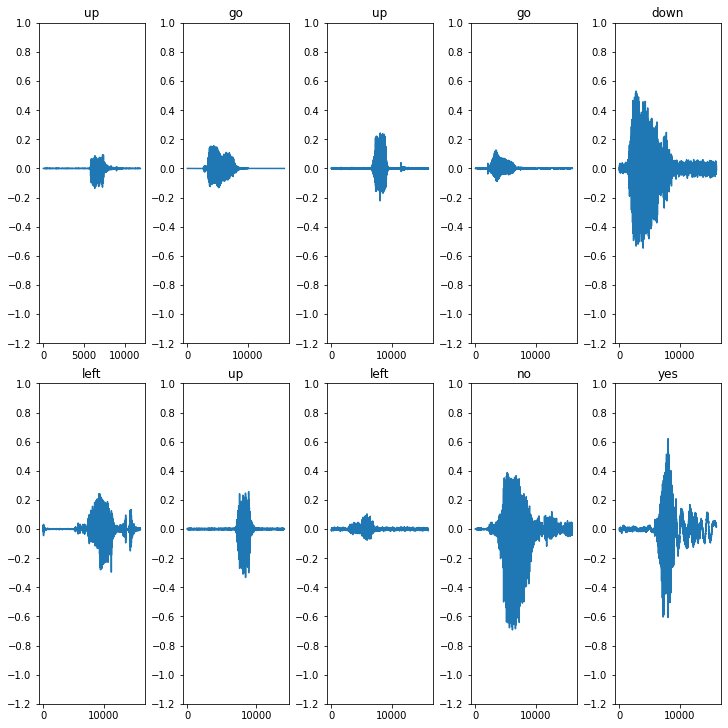

In [86]:
# 오디오 파형 시각화
rows,cols = 2,5
n = rows*cols
fig, ax = plt.subplots(rows,cols,figsize=(10,10), constrained_layout=True)
for i, (audio,label) in enumerate(waveform_ds.take(n)):
    ax[i//cols, i%cols].plot(audio.numpy())
    ax[i//cols, i%cols].set_yticks(np.arange(-1.2,1.2,0.2))
    label = label.numpy().decode('utf-8')
    ax[i//cols, i%cols].set_title(label)
plt.show()    

In [87]:
# 파형을 스펙트럼을 변경
def get_spectrogram(waveform) :
#     16,000 sample  16kHz 보다 적은 오디오 데이터는 zero-padding을 적용
# 시간 영역신호끝에 0을 추가하여 길이를 늘리는작업
    input_len = 16000
    waveform =  waveform[:input_len]
    zero_padding = tf.zeros( [input_len] - tf.shape(waveform), dtype=tf.float32)
    waveform =  tf.cast(waveform,dtype=tf.float32)
    equal_length = tf.concat([waveform,zero_padding],0)
    # waveform형태의 데이터를 스펙트럼 형태로 변환
    spectrogram = tf.signal.stft(equal_length,frame_length=255,frame_step=128)
    spectrogram = tf.abs(spectrogram)
    spectrogram = spectrogram[...,tf.newaxis]
    return spectrogram